In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('produce_data.csv')

In [5]:
new_df = df[:10]

In [9]:
train = new_df[:-4]
test = new_df[-4:]

In [10]:
historical_mean = np.mean(train['Maximum'])

In [11]:
historical_mean

29.0

In [12]:
test.loc[:, 'pred_mean'] = historical_mean

In [14]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
mape_hist_mean = mape(test['Maximum'], test['pred_mean'])
print(mape_hist_mean)

59.494047619047606


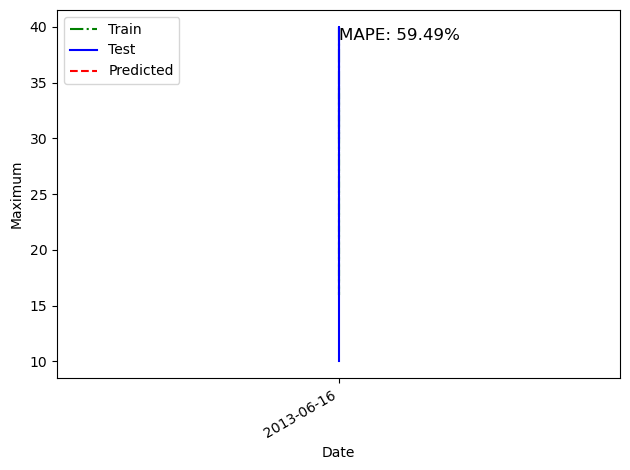

In [27]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Maximum'], 'g-.', label='Train')

ax.plot(test['Date'], test['Maximum'], 'b-', label='Test')

ax.plot(test['Date'], test['pred_mean'], 'r--', label='Predicted')

ax.set_xlabel('Date')
ax.set_ylabel('Maximum')

ax.text(0.5,0.95, f'MAPE: {mape_hist_mean:.2f}%', transform=ax.transAxes,
       fontsize=12, verticalalignment='top')

ax.legend(loc='upper left')

fig.autofmt_xdate()

plt.tight_layout()

plt.show()

In [28]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

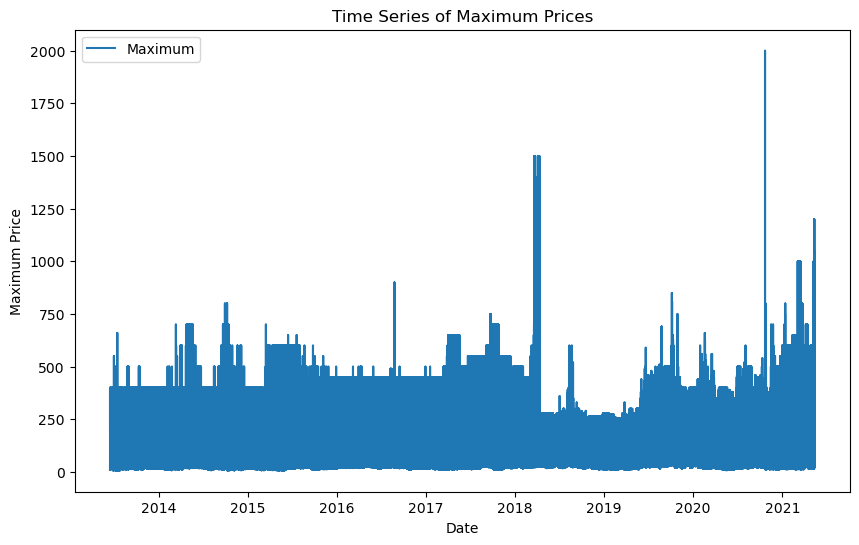

In [29]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Maximum'], label='Maximum')
plt.xlabel('Date')
plt.ylabel('Maximum Price')
plt.title('Time Series of Maximum Prices')
plt.legend()
plt.show()

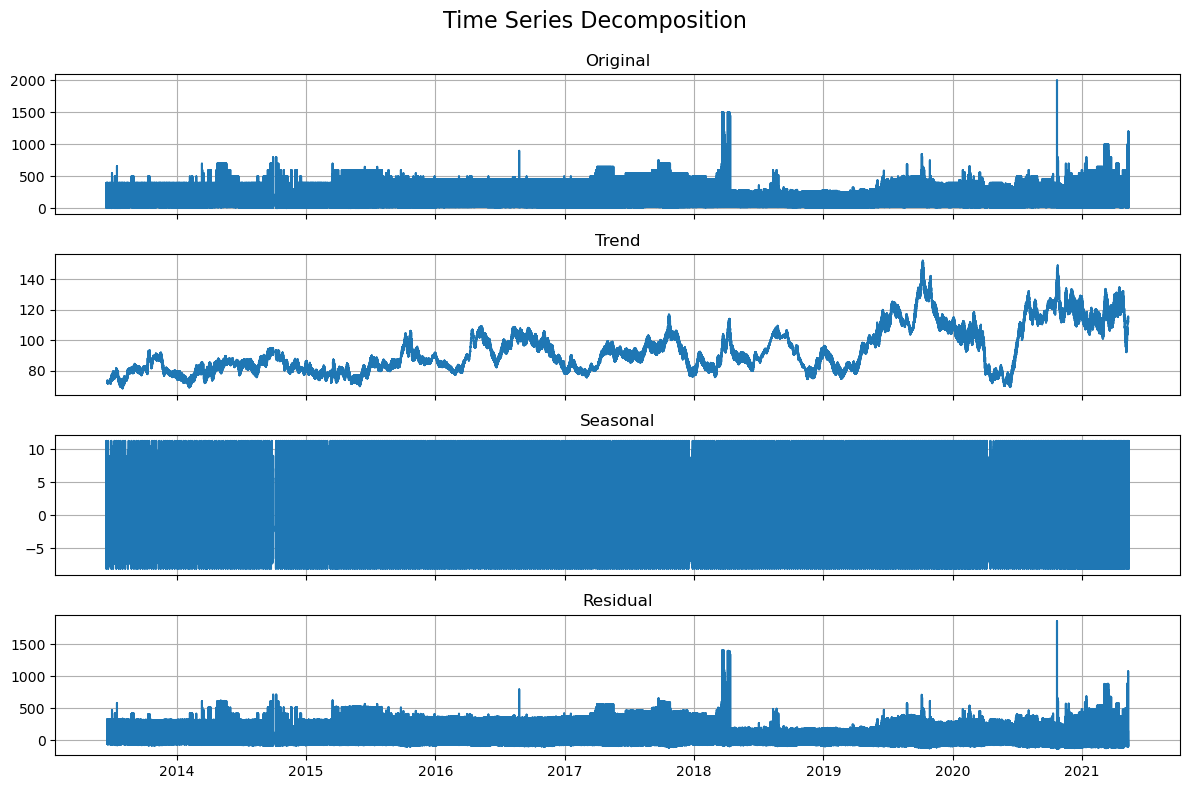

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming `data` is your time series data
data = ...  # Load your data here

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df['Maximum'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(df['Maximum'], label='Original')
ax1.set_title('Original')
ax1.grid(True)

ax2.plot(trend, label='Trend')
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(seasonal, label='Seasonal')
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(residual, label='Residual')
ax4.set_title('Residual')
ax4.grid(True)

fig.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

C:\Users\tsher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


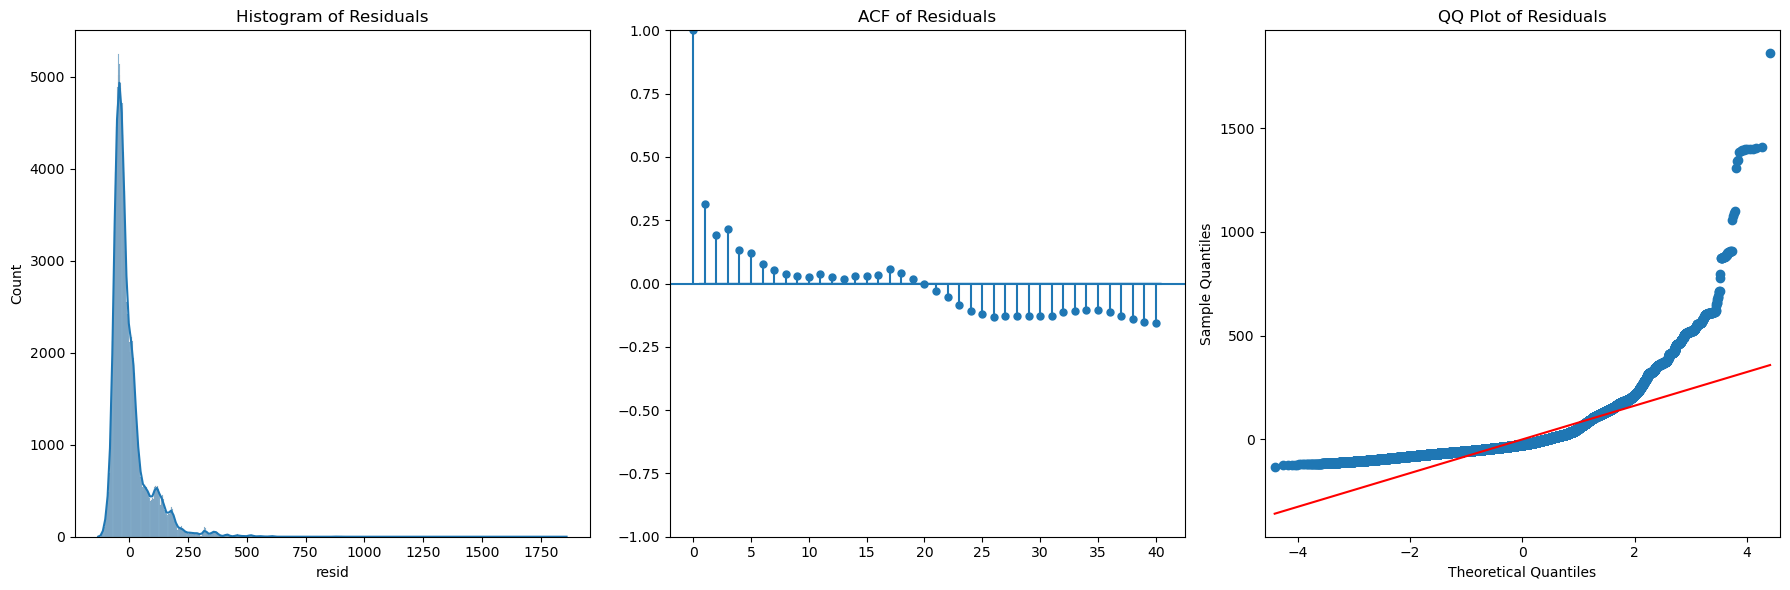

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# Assuming `data` is your time series data
data = ...  # Load your data here

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df['Maximum'], model='additive', period=365)
residual = decomposition.resid

# Drop NaN values from residuals
residual = residual.dropna()

# Plotting the residuals
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of residuals
sns.histplot(residual, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')

# ACF plot
sm.graphics.tsa.plot_acf(residual, lags=40, ax=ax[1])
ax[1].set_title('ACF of Residuals')

# QQ plot
sm.qqplot(residual, line='s', ax=ax[2])
ax[2].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()